In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
columns = [
            'dport', 'sport','protocol', 'flags', 'time bw prev packet','spkts','dpkts' ,'pkt_len', 'ttl', 'payload size', 'label'
        ]

dataset = pd.read_csv('../datasets/datasetv2.csv')
dataset.head()

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size,label
0,61159,40443,6,PA,1.714652e+09,0,310,290,38,248,benign
1,40443,61159,6,A,4.513574e-02,20,0,0,128,248,benign
2,61157,40443,6,A,1.532564e-01,0,1460,1440,38,248,benign
3,61157,40443,6,A,0.000000e+00,0,1460,1440,38,248,benign
4,40443,61157,6,A,7.574558e-04,20,0,0,128,248,benign


In [4]:
len(dataset.index)

799383

In [5]:
if mixed_dtypes := {c: dtype for c in dataset.columns if (dtype := pd.api.types.infer_dtype(dataset[c])).startswith("mixed")}:
    print(f"Columns with mixed data types: {mixed_dtypes}")


<Figure size 12800x12800 with 0 Axes>

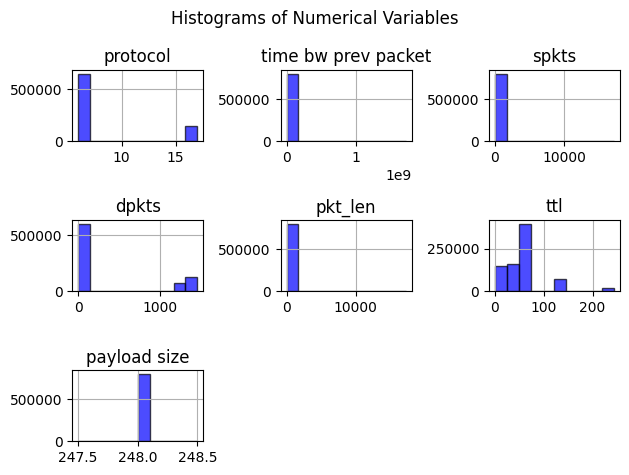

In [13]:
# Plotting a histogram of my dataset
import matplotlib.pyplot as plt

# Select numerical columns for histograms
numerical_columns = ['protocol', 'time bw prev packet','spkts','dpkts' ,'pkt_len', 'ttl', 'payload size']

# Create histograms
fig = plt.figure(figsize=(128,128))
dataset[numerical_columns].hist(bins=10, color='blue', alpha=0.7, edgecolor='black')

# Set title and labels
plt.suptitle('Histograms of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('histogram.png', dpi=1000)
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [5]:
# Replace 'nan' values with -1

dataset.fillna({'flags':'9'}, inplace=True)

dataset

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size,label
0,61159,40443,6,PA,1.714652e+09,0,310,290,38,248,benign
1,40443,61159,6,A,4.513574e-02,20,0,0,128,248,benign
2,61157,40443,6,A,1.532564e-01,0,1460,1440,38,248,benign
3,61157,40443,6,A,0.000000e+00,0,1460,1440,38,248,benign
4,40443,61157,6,A,7.574558e-04,20,0,0,128,248,benign
...,...,...,...,...,...,...,...,...,...,...,...
799378,59099,41512,6,S,5.011559e-04,0,26,2,55,248,nmap
799379,22832,41512,6,S,4.990101e-04,0,26,2,47,248,nmap
799380,22832,41512,6,S,0.000000e+00,0,26,2,47,248,nmap
799381,15653,41512,6,S,5.002022e-04,0,26,2,45,248,nmap


In [6]:
dataset[dataset['flags'].isna()] # No values are NaN now

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size,label


In [7]:
# We need to perform one hot encoding the flags parameter

def flags_to_encode(tcp_flags: str) -> int:
    if tcp_flags == '':
        print('empty string found')
    flag_mapping = {
        'F': '8',
        'S': '1',
        'R': '2',
        'P': '3',
        'A': '4',
        'U': '5',
        'E': '6',
        'C': '7',
        '0': '0',
        '9': '9'
    }
    list_of_flags = list()
    try:
        list_of_flags = list(tcp_flags)
    except:
        print(tcp_flags)
    encoded_flag = ''
    for flag in list_of_flags:
        encoded_flag += flag_mapping[flag]
    
    return int(encoded_flag)

dataset['flags'] = dataset['flags'].apply(flags_to_encode)

In [8]:
# Getting data and label
X = dataset[columns[:-1]] # exclude the last column
y = dataset.label
X.head()

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size
0,61159,40443,6,34,1.714652e+09,0,310,290,38,248
1,40443,61159,6,4,4.513574e-02,20,0,0,128,248
2,61157,40443,6,4,1.532564e-01,0,1460,1440,38,248
3,61157,40443,6,4,0.000000e+00,0,1460,1440,38,248
4,40443,61157,6,4,7.574558e-04,20,0,0,128,248


In [9]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X.head(20)

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size
0,61159,40443,6,34,1.714652e+09,0,310,290,38,248
1,40443,61159,6,4,4.513574e-02,20,0,0,128,248
2,61157,40443,6,4,1.532564e-01,0,1460,1440,38,248
3,61157,40443,6,4,0.000000e+00,0,1460,1440,38,248
4,40443,61157,6,4,7.574558e-04,20,0,0,128,248
5,61157,40443,6,4,0.000000e+00,0,1460,1440,38,248
6,61157,40443,6,4,0.000000e+00,0,1460,1440,38,248
7,40443,61157,6,4,1.011372e-03,20,0,0,128,248
8,61157,40443,6,4,0.000000e+00,0,1460,1440,38,248
9,61157,40443,6,4,1.411676e-03,0,1460,1440,38,248


In [10]:
# Building the decision tree
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

In [11]:
# Model evaluation

print(f'Accuracy: {metrics.accuracy_score(y_test,y_pred)}')

Accuracy: 0.9999624711496963


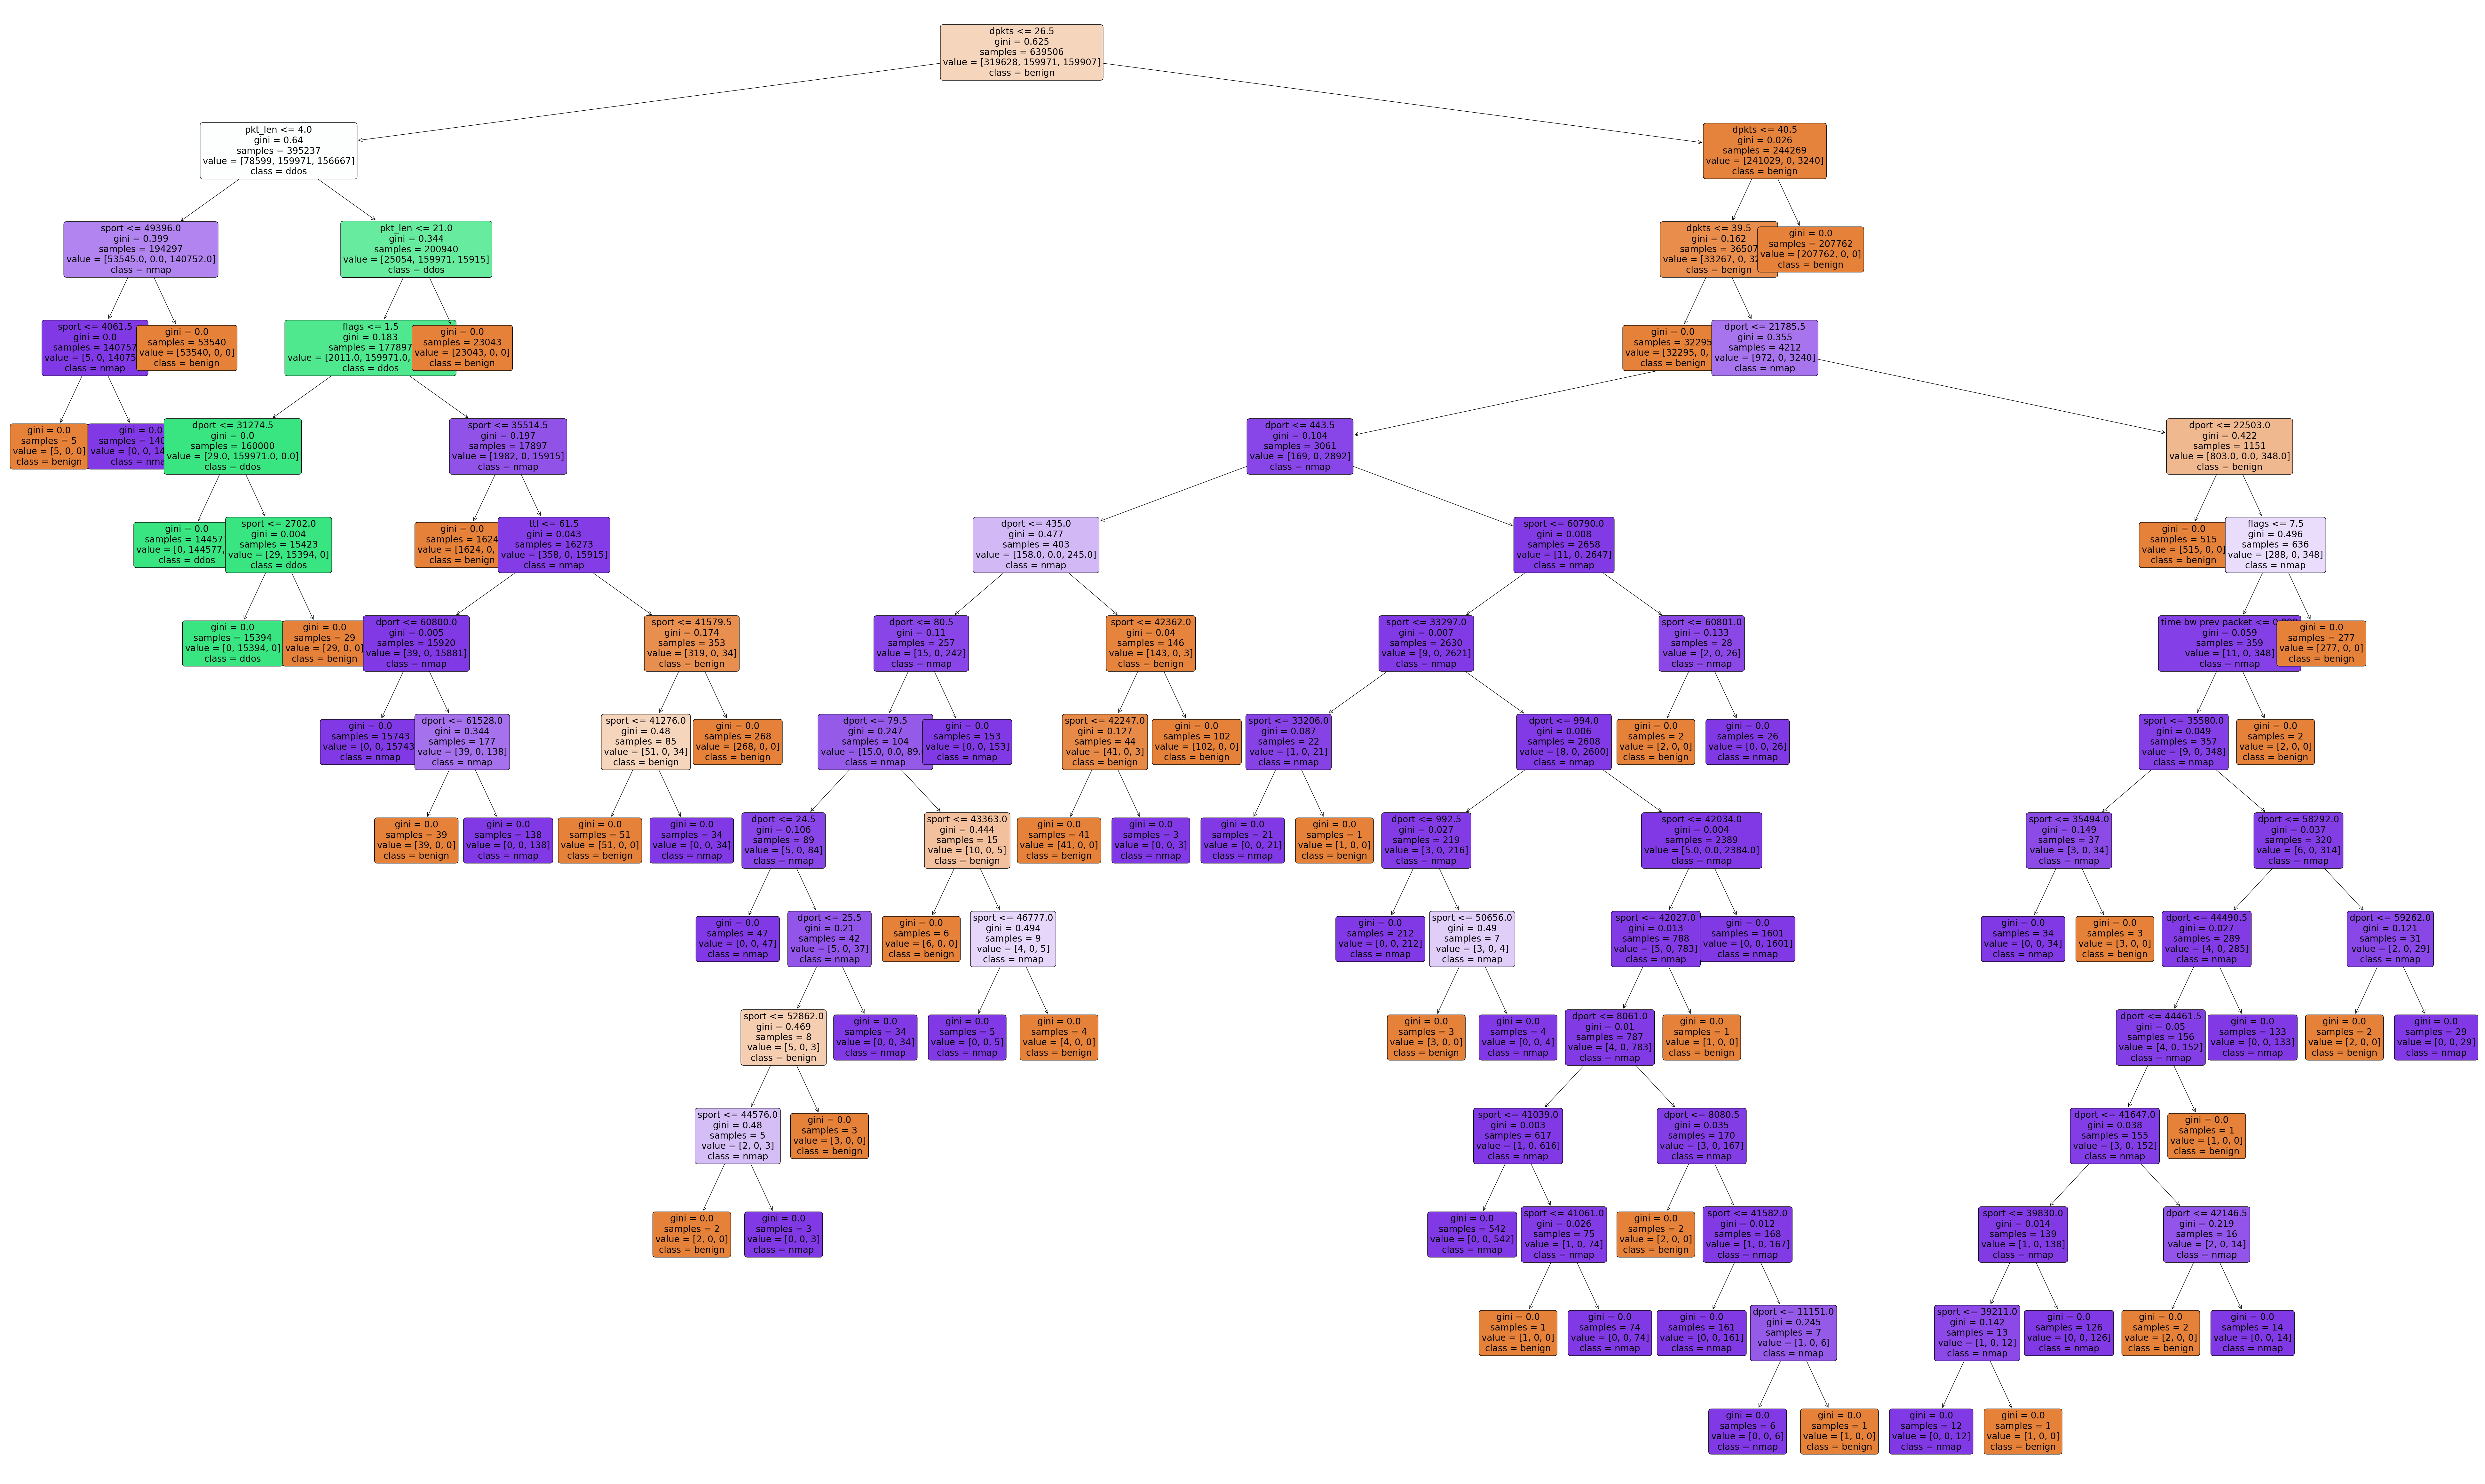

In [12]:
# Visualizing the tree
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(100, 60))

_ = plot_tree(decision_tree=model, 
              feature_names=columns[:-1],
              class_names=['benign', 'ddos', 'nmap', 'ssh-bruteforce', 'ftp-bruteforce'],
              filled=True, rounded=True, fontsize=20)
plt.savefig('decision_tree.png')
plt.show()

In [13]:
from sklearn.tree import export_graphviz
import pydot
export_graphviz(model, out_file=open('tree.dot', 'w'), feature_names=columns[:-1],
                filled=True, rounded=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('dt_tree.png')

In [14]:
from joblib import dump

dump(model, 'dt_classifier.pkl')

['dt_classifier.pkl']

In [35]:
len(dataset.index)

357889

In [30]:
# Trying random forest as well
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [31]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9999534307561914


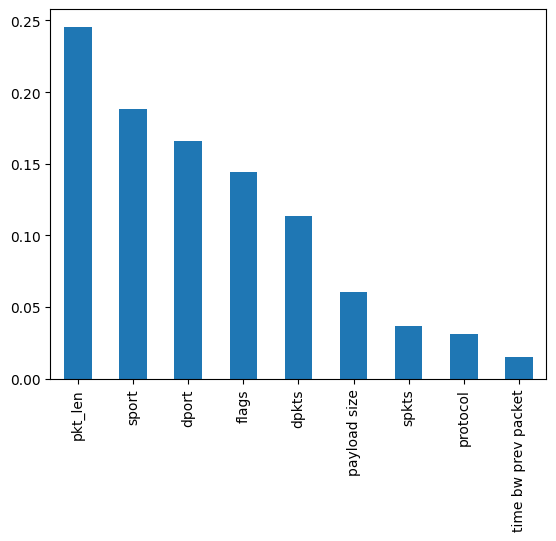

In [32]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [34]:
from joblib import dump

dump(rf, 'random_forest.pkl')

['random_forest.pkl']

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

ssh_data = pd.read_csv('../ssh_dataset.csv')
ssh_data.head()
print(len(ssh_data.index))

486177


In [6]:
# ssh_data['flags'] = ssh_data['flags'].apply(flags_to_encode)
# ssh_data.head()

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,payload size,label
0,22,56056,6,1,1.714189e+09,0,40,0,224,ssh_bruteforce
1,56056,22,6,14,3.526211e-04,40,0,0,224,ssh_bruteforce
2,22,56056,6,4,2.858639e-04,0,32,0,224,ssh_bruteforce
3,22,56056,6,34,2.174377e-04,0,55,23,224,ssh_bruteforce
4,56056,22,6,4,2.787113e-04,32,0,0,224,ssh_bruteforce


In [4]:
columns = [
           'dport', 'sport','time' ,'protocol', 'time bw prev packet','spkts','dpkts' 
           ,'pkt_len', 'avgpkt','medpkt','stdpkt','avgBytes','medBytes','stdBytes','avgPktSz','medPktSz','stdPktSz', 'label'
        ]

X = ssh_data[columns[:-1]]
y = ssh_data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy: {accuracy}")

Random Forest accuracy: 1.0


In [6]:
from joblib import dump
dump(random_forest,'ssh_rf.pkl')

['ssh_rf.pkl']

In [7]:
len(X_train.index)

340323